In [844]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-info">
<b>В настоящем проекте мы обработаем данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.
    Проанализировав данные мы выявим определяющие успешность игры закономерности для того что бы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    Попробуем спрогнозировать продажи на 2017 год.
    </b> 
</div>

### Открываем файл с данными и изучаем общую информацию

In [845]:
data = pd.read_csv('/datasets/games.csv')

In [846]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Выводы
1. Ввсего 11 столбцов из которых без пропусков: "Platform", "NA_sales", "EU_sales", "JP_sales" и "Other_sales".
2. Тип данных в столбцах "Year_of_Release", "Critic_Score", "User_Score" и "Rating" необходимо проверить и преобразовать.

### Подготовка данных

In [847]:
data = data.drop_duplicates().reset_index(drop=True) 
# удаляем все полные дубликаты если они есть.

In [848]:
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release',
                            'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 
                           'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})
# Заменяем названия столбцов (приводим к нижнему регистру) 

In [849]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
# меняем тип данных в столбце "year_of_release" на datetime64

In [850]:
data['name'] = data['name'].str.lower() # приволим к нижнему регистру данные в столбце "name"
data = data.dropna(subset=['name']).reset_index(drop=True) # удаляем строки из data в которых пропуски в столбце "name"
data['name'].isna().sum() # проверяем кол-во пропусков в столбце "name"

0

(-0.5, 1.0)

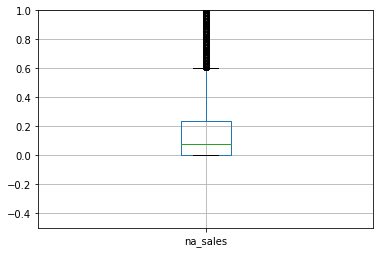

In [851]:
data.boxplot(column=['na_sales'])
plt.ylim(-0.5, 1)

In [852]:
data['na_sales'].describe()

count    16713.000000
mean         0.263302
std          0.813565
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [853]:
 data.loc[(data['na_sales'] > 0.6), 'na_sales'].count() / data['na_sales'].shape[0] * 100 
    # процент выбросов по столбцу  "na_sales"

10.087955483755161

In [854]:
#data['na_sales'] = np.where(data['na_sales'] <= 0.6, data['na_sales'], float('nan'))
#data = data.dropna(subset=['na_sales'])
# удаляем выбросы в data по столбцу 'na_sales' т.к. их всего 10 % от всех данных
data['na_sales'].sort_values(ascending=False).head()

0    41.36
1    29.08
9    26.93
5    23.20
2    15.68
Name: na_sales, dtype: float64

<AxesSubplot:>

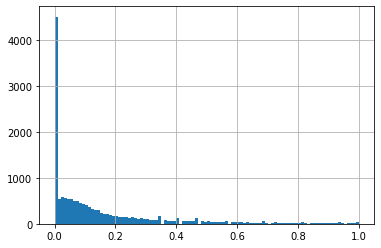

In [855]:
data['na_sales'].hist(bins=100, range=(0, 1))

(-0.1, 0.4)

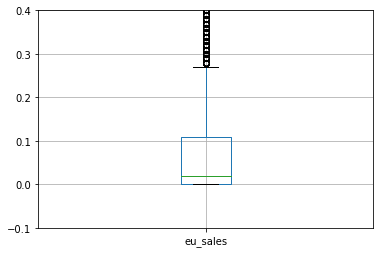

In [856]:
data.boxplot(column=['eu_sales'])
plt.ylim(-0.1, 0.4)

In [857]:
data['eu_sales'].describe()

count    16713.000000
mean         0.145045
std          0.503359
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [858]:
 data.loc[(data['eu_sales'] > 0.18), 'eu_sales'].count() / data['eu_sales'].shape[0] * 100 
    # процент выбросов по столбцу  "eu_sales"

17.202177945312034

In [859]:
#data['eu_sales'] = np.where(data['eu_sales'] <= 0.18, data['eu_sales'], float('nan'))
#data = data.dropna(subset=['eu_sales'])
# удаляем выбросы в data по столбцу 'na_sales' т.к. их примерно 10 % от всех данных
data['eu_sales'].sort_values(ascending=False).head()

0     28.96
2     12.76
10    10.95
3     10.93
19     9.20
Name: eu_sales, dtype: float64

<AxesSubplot:>

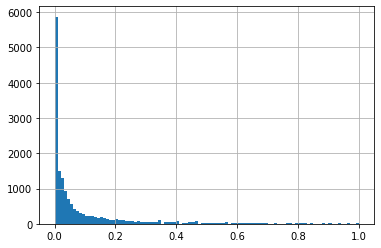

In [860]:
data['eu_sales'].hist(bins=100, range=(0, 1))

(-0.1, 0.2)

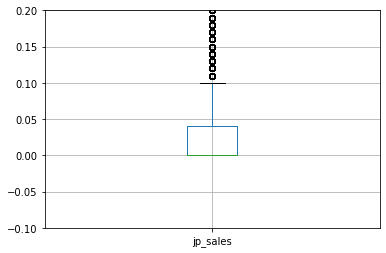

In [861]:
data.boxplot(column=['jp_sales'])
plt.ylim(-0.1, 0.2)

In [862]:
data['jp_sales'].describe()

count    16713.000000
mean         0.077625
std          0.308871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [863]:
 data.loc[(data['jp_sales'] > 0.13), 'jp_sales'].count() / data['jp_sales'].shape[0] * 100 
    # процент выбросов по столбцу  "jp_sales". Выбираем 0.13млн т.к. при этом условии процент удаление выбросов будет в районе 10%
    

12.068449709806737

In [864]:
#data['jp_sales'] = np.where(data['jp_sales'] <= 0.13, data['jp_sales'], float('nan'))
#data = data.dropna(subset=['jp_sales'])
# удаляем выбросы в data по столбцу 'jp_sales' т.к. их примерно 10 % от всех данных
data['jp_sales'].sort_values(ascending=False).head()

4     10.22
12     7.20
1      6.81
6      6.50
20     6.04
Name: jp_sales, dtype: float64

<AxesSubplot:>

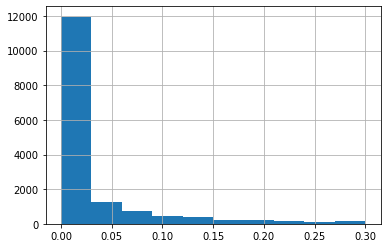

In [865]:
data['jp_sales'].hist(bins=10, range=(0, 0.3))

(-0.1, 0.2)

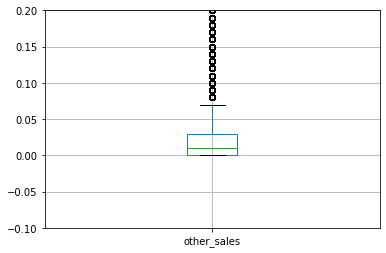

In [866]:
data.boxplot(column=['other_sales'])
plt.ylim(-0.1, 0.2)

In [867]:
data['other_sales'].describe()

count    16713.000000
mean         0.047343
std          0.186742
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

In [868]:
data.loc[(data['other_sales'] > 0.05), 'other_sales'].count() / data['other_sales'].shape[0] * 100 
# процент выбросов по столбцу  "other_sales"

17.79453120325495

In [869]:
#data['other_sales'] = np.where(data['other_sales'] <= 0.05, data['other_sales'], float('nan'))
#data = data.dropna(subset=['other_sales'])
# удаляем выбросы в data по столбцу 'other_sales' т.к. их меньше 10 % от всех данных
data['other_sales'].sort_values(ascending=False).head()

17    10.57
0      8.45
48     7.53
16     3.96
2      3.29
Name: other_sales, dtype: float64

<AxesSubplot:>

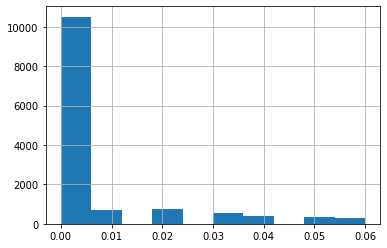

In [870]:
data['jp_sales'].hist(range=(0, 0.06))

In [871]:
data['critic_score'].isna().sum() / data['critic_score'].shape[0] * 100
# кол-во % пропусков в 'critic_score'

51.313348890085564

In [872]:
data['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [873]:

        
data.loc[data['genre']=='Sports', 'critic_score'] = (data.loc[data['genre']=='Sports', 'critic_score'].
                                                 fillna(data.loc[data['genre']=='Sports', 'critic_score'].median()))
data.loc[data['genre']=='Platform', 'critic_score'] = (data.loc[data['genre']=='Platform', 'critic_score'].
                                                 fillna(data.loc[data['genre']=='Platform', 'critic_score'].median()))
data.loc[data['genre']=='Racing', 'critic_score'] = (data.loc[data['genre']=='Racing', 'critic_score'].
                                                 fillna(data.loc[data['genre']=='Racing', 'critic_score'].median()))
data.loc[data['genre']=='Role-Playing', 'critic_score'] = (data.loc[data['genre']=='Role-Playing', 'critic_score'].
                                                 fillna(data.loc[data['genre']=='Role-Playing', 'critic_score'].median()))
data.loc[data['genre']=='Puzzle', 'critic_score'] = (data.loc[data['genre']=='Puzzle', 'critic_score'].
                                                 fillna(data.loc[data['genre']=='Puzzle', 'critic_score'].median()))
data.loc[data['genre']=='Misc', 'critic_score'] = (data.loc[data['genre']=='Misc', 'critic_score'].
                                                 fillna(data.loc[data['genre']=='Misc', 'critic_score'].median()))
data.loc[data['genre']=='Shooter', 'critic_score'] = (data.loc[data['genre']=='Shooter', 'critic_score'].
                                                 fillna(data.loc[data['genre']=='Shooter', 'critic_score'].median()))
data.loc[data['genre']=='Simulation', 'critic_score'] = (data.loc[data['genre']=='Simulation', 'critic_score'].
                                                 fillna(data.loc[data['genre']=='Simulation', 'critic_score'].median()))
data.loc[data['genre']=='Action', 'critic_score'] = (data.loc[data['genre']=='Action', 'critic_score'].
                                                 fillna(data.loc[data['genre']=='Action', 'critic_score'].median()))
data.loc[data['genre']=='Fighting', 'critic_score'] = (data.loc[data['genre']=='Fighting', 'critic_score'].
                                                 fillna(data.loc[data['genre']=='Fighting', 'critic_score'].median()))
data.loc[data['genre']=='Adventure', 'critic_score'] = (data.loc[data['genre']=='Adventure', 'critic_score'].
                                                 fillna(data.loc[data['genre']=='Adventure', 'critic_score'].median()))
data.loc[data['genre']=='Strategy', 'critic_score'] = (data.loc[data['genre']=='Strategy', 'critic_score'].
                                                 fillna(data.loc[data['genre']=='Strategy', 'critic_score'].median()))

data['critic_score'] = data['critic_score'].astype('int')
# преобразуем тип данных  'critic_score'  в int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     16713 non-null  int64         
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.4+ MB


In [874]:
data['user_score'].isna().sum() / data['user_score'].shape[0] * 100
# кол-во % пропусков в 'critic_score'

40.0825704541375

In [875]:
data['user_score'] = np.where(data['user_score'] != 'tbd', data['user_score'], float('nan'))
# заменяем в столбце 'user_score' строки с 'tbd' на nan



data.loc[data['genre']=='Sports', 'user_score'] = (data.loc[data['genre']=='Sports', 'user_score'].
                                                 fillna(data.loc[data['genre']=='Sports', 'user_score'].median()))
data.loc[data['genre']=='Platform', 'user_score'] = (data.loc[data['genre']=='Platform', 'user_score'].
                                                 fillna(data.loc[data['genre']=='Platform', 'user_score'].median()))
data.loc[data['genre']=='Racing', 'user_score'] = (data.loc[data['genre']=='Racing', 'user_score'].
                                                 fillna(data.loc[data['genre']=='Racing', 'user_score'].median()))
data.loc[data['genre']=='Role-Playing', 'user_score'] = (data.loc[data['genre']=='Role-Playing', 'user_score'].
                                                 fillna(data.loc[data['genre']=='Role-Playing', 'user_score'].median()))
data.loc[data['genre']=='Puzzle', 'user_score'] = (data.loc[data['genre']=='Puzzle', 'user_score'].
                                                 fillna(data.loc[data['genre']=='Puzzle', 'user_score'].median()))
data.loc[data['genre']=='Misc', 'user_score'] = (data.loc[data['genre']=='Misc', 'user_score'].
                                                 fillna(data.loc[data['genre']=='Misc', 'user_score'].median()))
data.loc[data['genre']=='Shooter', 'user_score'] = (data.loc[data['genre']=='Shooter', 'user_score'].
                                                 fillna(data.loc[data['genre']=='Shooter', 'user_score'].median()))
data.loc[data['genre']=='Simulation', 'user_score'] = (data.loc[data['genre']=='Simulation', 'user_score'].
                                                 fillna(data.loc[data['genre']=='Simulation', 'user_score'].median()))
data.loc[data['genre']=='Action', 'user_score'] = (data.loc[data['genre']=='Action', 'user_score'].
                                                 fillna(data.loc[data['genre']=='Action', 'user_score'].median()))
data.loc[data['genre']=='Fighting', 'user_score'] = (data.loc[data['genre']=='Fighting', 'user_score'].
                                                 fillna(data.loc[data['genre']=='Fighting', 'user_score'].median()))
data.loc[data['genre']=='Adventure', 'user_score'] = (data.loc[data['genre']=='Adventure', 'user_score'].
                                                 fillna(data.loc[data['genre']=='Adventure', 'user_score'].median()))
data.loc[data['genre']=='Strategy', 'user_score'] = (data.loc[data['genre']=='Strategy', 'user_score'].
                                                 fillna(data.loc[data['genre']=='Strategy', 'user_score'].median()))



data['user_score'] = data['user_score'].astype('float')
# преобразуем тип данных  'user_score'  в float
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     16713 non-null  int64         
 9   user_score       16713 non-null  float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [876]:
data['rating'].unique()
# уникальные значения столбца 'rating'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [877]:
data['rating'].isna().sum() / data['rating'].shape[0] * 100
# кол-во % пропусков в 'rating'

40.4714892598576

In [878]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.sort_values('total_sales', ascending=False).head(10)
# создаем в data столбец total_sales - сумма продаж по регионам и выводим первые 10 строк data в порядке убывания по столбцу total_sales 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,69,7.7,NaN,40.24
2,mario kart wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,74,7.8,NaN,31.38
5,tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,70,7.5,NaN,30.26
6,new super mario bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,wii play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,new super mario bros. wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,duck hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,73,7.4,NaN,28.31


In [879]:
data['total_sales_2'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data['total_sales_2'].head()


0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales_2, dtype: float64

**Выводы:**

1. Были заменены названия столбцов (приведите к нижнему регистру).
2. Тип данных в year_of_release форматирован на datetime64
3. Удалили две строки, где пропуски в name
4. Удалили выбросы по столбцам na_sales, eu_sales, jp_sales, other_sales с условием, что кол-во выбросов не более 11%
5. Заполнили медианным значением пропуски в critic_score и привели к типу данных int
6. Заполнили медианным значением пропуски в user_score и привели к типу данных float
7. Добавили к data столбец total_sales сумма продаж по всем регионам

### Исследовательский анализ данных

In [880]:
number_games = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count').reset_index()
number_games.sort_values('name', ascending=False).head(10)
# Формируем сводную таблицу number_games с данными по кол-ву игр относительно года реализа. 
# Выводим сводную таблицу отсоритрованную в порядке убывания (первые 10 строк).

,year_of_release,name
28,2008-01-01,1427
29,2009-01-01,1426
30,2010-01-01,1255
27,2007-01-01,1197
31,2011-01-01,1136
26,2006-01-01,1006
25,2005-01-01,939
22,2002-01-01,829
23,2003-01-01,775
24,2004-01-01,762


<AxesSubplot:xlabel='year_of_release'>

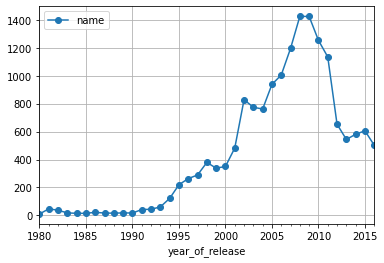

In [881]:
number_games.plot(x='year_of_release', y='name', style='o-', grid=True)
# визуализируем кол-во игр по годам


In [882]:
sales_platform = pd.pivot_table(data, index='platform',  values='total_sales',
                                aggfunc=np.sum)
# Формируем сводную таблицу sales_platform с данными по сумме продаж относительно игровых платформ.

sales_platform.sort_values('total_sales', ascending=False).head(10)
# Выводим сводную таблицу sales_platform отсоритрованную в порядке убывания. Топ 10

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [883]:
year_platform = pd.pivot_table(data, index=['platform', 'year_of_release'], values='total_sales',
                                aggfunc=np.sum).reset_index()
year_platform['year_of_release'] = year_platform['year_of_release'].dt.year
year_platform
# формируем сводную таблицу кол-во лет существование платформы

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


In [884]:
year_platform_pivot = pd.pivot_table(year_platform, index='platform', values='year_of_release',
                                aggfunc='count')

year_platform_pivot.sort_values('year_of_release', ascending=False).head(10)

# формируем таблицу с кол-во существования(года когда под платформы выходили игры) в годах платформ

,year_of_release
platform,
PC,26
GB,13
NES,12
X360,12
PSP,12
PS2,12
Wii,11
DS,11
PS3,11


In [885]:
year_platform_pivot['year_of_release'].describe()
# смотрим основные данные по распределению данных в таблице year_platform_pivot

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

In [886]:
year_platform_name = pd.pivot_table(data, index=['platform', 'year_of_release'], values='total_sales',
                                aggfunc=np.sum).reset_index()
year_platform_name.sort_values('year_of_release', ascending=False).head(10) # смотрим под какие платформы выпускались игры в 2016 году

,platform,year_of_release,total_sales
237,XOne,2016-01-01,26.15
224,X360,2016-01-01,1.52
212,WiiU,2016-01-01,4.60
207,Wii,2016-01-01,0.18
156,PS4,2016-01-01,69.25
17,3DS,2016-01-01,15.14
152,PS3,2016-01-01,3.60
174,PSV,2016-01-01,4.25
118,PC,2016-01-01,5.25
211,WiiU,2015-01-01,16.35


<AxesSubplot:xlabel='year_of_release'>

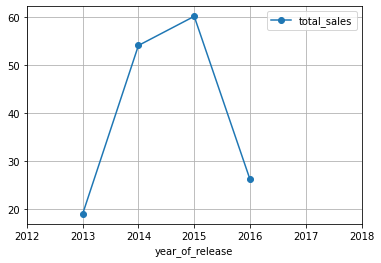

In [887]:
XOne_pivot = pd.pivot_table(data.loc[data['platform']=='XOne'], index='year_of_release', values='total_sales',
                                aggfunc=np.sum).reset_index()

XOne_pivot.plot(x='year_of_release', y='total_sales', style='o-', grid=True, xlim=('01.01.2012','01.01.2018'))
# смотрим график суммарных продаж по годам платформы XOne

<AxesSubplot:xlabel='year_of_release'>

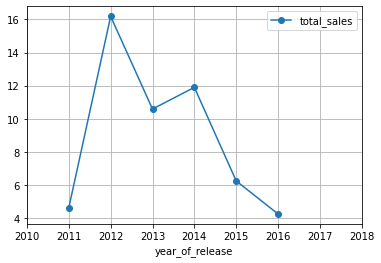

In [888]:
XOne_pivot = pd.pivot_table(data.loc[data['platform']=='PSV'], index='year_of_release', values='total_sales',
                                aggfunc=np.sum).reset_index()

XOne_pivot.plot(x='year_of_release', y='total_sales', style='o-', grid=True, xlim=('01.01.2010','01.01.2018'))
# смотрим график суммарных продаж по годам платформы PSV

<AxesSubplot:xlabel='year_of_release'>

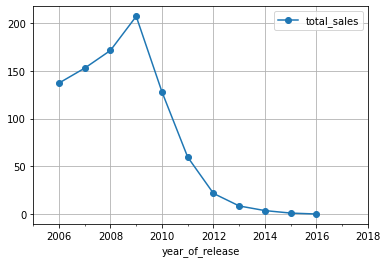

In [889]:
XOne_pivot = pd.pivot_table(data.loc[data['platform']=='Wii'], index='year_of_release', values='total_sales',
                                aggfunc=np.sum).reset_index()

XOne_pivot.plot(x='year_of_release', y='total_sales', style='o-', grid=True, xlim=('01.01.2005','01.01.2018'))
# смотрим график суммарных продаж по годам платформы Wii

<AxesSubplot:xlabel='year_of_release'>

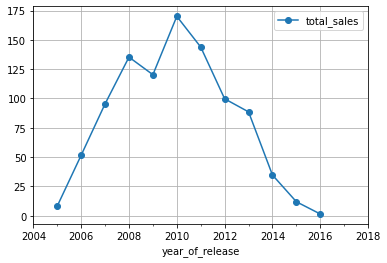

In [890]:
XOne_pivot = pd.pivot_table(data.loc[data['platform']=='X360'], index='year_of_release', values='total_sales',
                                aggfunc=np.sum).reset_index()

XOne_pivot.plot(x='year_of_release', y='total_sales', style='o-', grid=True, xlim=('01.01.2004','01.01.2018'))
# смотрим график суммарных продаж по годам платформы X360

<AxesSubplot:xlabel='year_of_release'>

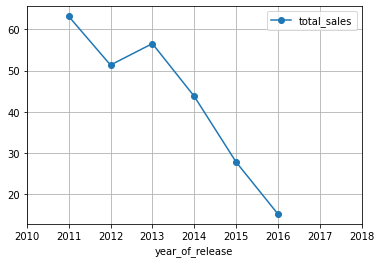

In [891]:
XOne_pivot = pd.pivot_table(data.loc[data['platform']=='3DS'], index='year_of_release', values='total_sales',
                                aggfunc=np.sum).reset_index()

XOne_pivot.plot(x='year_of_release', y='total_sales', style='o-', grid=True, xlim=('01.01.2010','01.01.2018'))
# смотрим график суммарных продаж по годам платформы 3DS

<AxesSubplot:xlabel='year_of_release'>

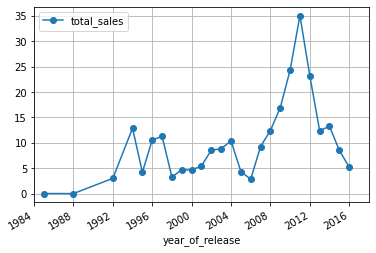

In [892]:
XOne_pivot = pd.pivot_table(data.loc[data['platform']=='PC'], index='year_of_release', values='total_sales',
                                aggfunc=np.sum).reset_index()

XOne_pivot.plot(x='year_of_release', y='total_sales', style='o-', grid=True, xlim=('01.01.1984','01.01.2018'))
# смотрим график суммарных продаж по годам платформы PC

<AxesSubplot:xlabel='year_of_release'>

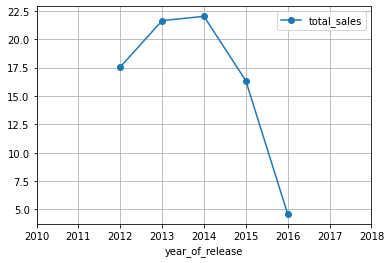

In [893]:
XOne_pivot = pd.pivot_table(data.loc[data['platform']=='WiiU'], index='year_of_release', values='total_sales',
                                aggfunc=np.sum).reset_index()

XOne_pivot.plot(x='year_of_release', y='total_sales', style='o-', grid=True, xlim=('01.01.2010','01.01.2018'))
# смотрим график суммарных продаж по годам платформы WiiU

<AxesSubplot:xlabel='year_of_release'>

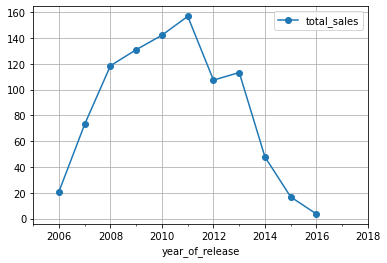

In [894]:
XOne_pivot = pd.pivot_table(data.loc[data['platform']=='PS3'], index='year_of_release', values='total_sales',
                                aggfunc=np.sum).reset_index()

XOne_pivot.plot(x='year_of_release', y='total_sales', style='o-', grid=True, xlim=('01.01.2005','01.01.2018'))
# смотрим график суммарных продаж по годам платформы PS3

<AxesSubplot:xlabel='year_of_release'>

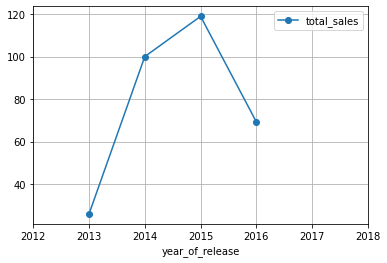

In [895]:
XOne_pivot = pd.pivot_table(data.loc[data['platform']=='PS4'], index='year_of_release', values='total_sales',
                                aggfunc=np.sum).reset_index()

XOne_pivot.plot(x='year_of_release', y='total_sales', style='o-', grid=True, xlim=('01.01.2012','01.01.2018'))
# смотрим график суммарных продаж по годам платформы PS4

In [896]:
data['year_of_release'] = pd.DatetimeIndex(data['year_of_release']).year

(0.0, 2.0)

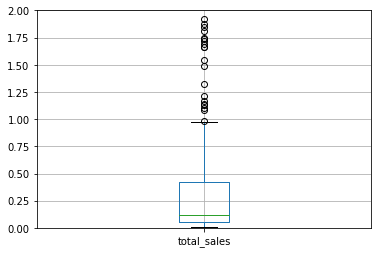

In [897]:
data.loc[(data['platform']=='PS4') & (data['year_of_release'] > 2014)].boxplot(column=['total_sales'])
# строим график «ящик с усами» по глобальным продажам игр по платформe PS4. 
plt.ylim(0, 2)

In [898]:
data.loc[(data['platform']=='PS4') & (data['year_of_release'] > 2014)]['total_sales'].describe()

count    301.000000
mean       0.625083
std        1.457063
min        0.010000
25%        0.050000
50%        0.120000
75%        0.420000
max       14.630000
Name: total_sales, dtype: float64

(0.0, 2.0)

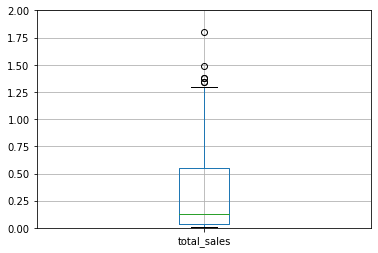

In [899]:
data.loc[(data['platform']=='XOne') & (data['year_of_release'] > 2014)].boxplot(column=['total_sales'])
# строим график «ящик с усами» по глобальным продажам игр по платформe XOne.
plt.ylim(0, 2)

In [900]:
data.loc[(data['platform']=='XOne') & (data['year_of_release'] > 2014)]['total_sales'].describe()

count    167.000000
mean       0.516707
std        0.965940
min        0.010000
25%        0.035000
50%        0.130000
75%        0.555000
max        7.390000
Name: total_sales, dtype: float64

(0.0, 1.0)

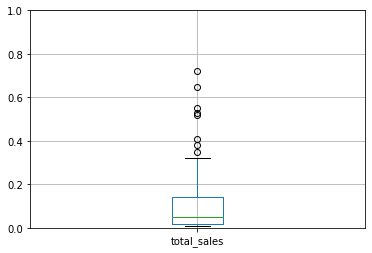

In [901]:
data.loc[(data['platform']=='PC') & (data['year_of_release'] > 2014)].boxplot(column=['total_sales'])
plt.ylim(0, 1)

In [902]:
data.loc[(data['platform']=='PC') & (data['year_of_release'] > 2014)]['total_sales'].describe()

count    104.000000
mean       0.132404
std        0.209449
min        0.010000
25%        0.020000
50%        0.050000
75%        0.142500
max        1.280000
Name: total_sales, dtype: float64

<div class="alert alert-info">
<b> 
    
    
    Вывод:
    
  - Экономически самая выгодная платформа XOne т.к. сумма продаж выше (на это указывает медиана, она больше чем у PS4 и PC, а так же Q4  выше чем у остальных платформ)
  - Экономически не самая выгодная платформа PC т.к. сумма продаж ниже (на это указывает медиана, она меньше чем у PS4 и PC, а так же Q4  ниже чем у остальных платформ)  
    
</b> 
</div>

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

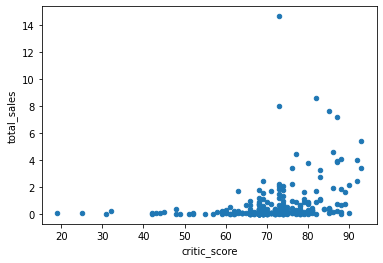

In [903]:
(data.loc[(data['platform']=='PS4') & (data['year_of_release'] > 2014)].
 plot(x = 'critic_score', y = 'total_sales', kind='scatter'))

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

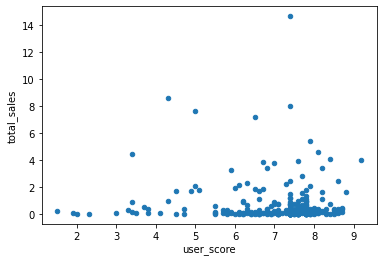

In [904]:
(data.loc[(data['platform']=='PS4') & (data['year_of_release'] > 2014)].
 plot(x = 'user_score', y = 'total_sales', kind='scatter'))

In [905]:
(data.loc[(data['platform']=='PS4') & (data['year_of_release'] > 2014)]['critic_score'].
 corr(data.loc[(data['platform']=='PS4') & (data['year_of_release'] > 2014)]['total_sales']))

0.31180455919585487

In [906]:
(data.loc[(data['platform']=='PS4') & (data['year_of_release'] > 2014)]['user_score'].
 corr(data.loc[(data['platform']=='PS4') & (data['year_of_release'] > 2014)]['total_sales']))

-0.06922582020378636

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

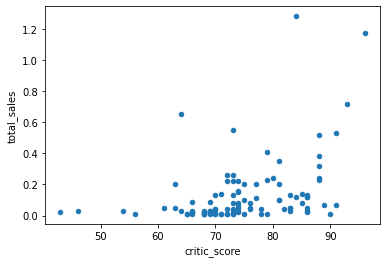

In [907]:
(data.loc[(data['platform']=='PC') & (data['year_of_release'] > 2014)].
 plot(x = 'critic_score', y = 'total_sales', kind='scatter'))

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

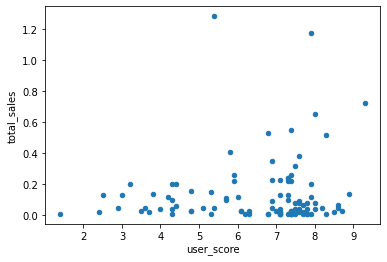

In [908]:
(data.loc[(data['platform']=='PC') & (data['year_of_release'] > 2014)].
 plot(x = 'user_score', y = 'total_sales', kind='scatter'))

In [909]:
(data.loc[(data['platform']=='PC') & (data['year_of_release'] > 2014)]['critic_score'].
 corr(data.loc[(data['platform']=='PC') & (data['year_of_release'] > 2014)]['total_sales']))

0.40482859683586353

In [910]:
(data.loc[(data['platform']=='PC') & (data['year_of_release'] > 2014)]['user_score'].
 corr(data.loc[(data['platform']=='PC') & (data['year_of_release'] > 2014)]['total_sales']))

0.09714668028325325

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

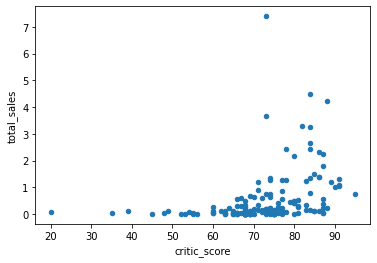

In [911]:
(data.loc[(data['platform']=='XOne') & (data['year_of_release'] > 2014)].
 plot(x = 'critic_score', y = 'total_sales', kind='scatter'))

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

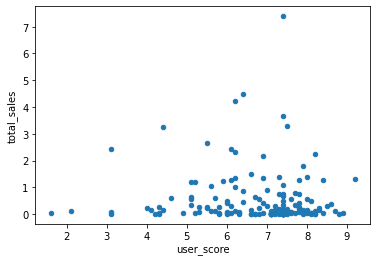

In [912]:
(data.loc[(data['platform']=='XOne') & (data['year_of_release'] > 2014)].
 plot(x = 'user_score', y = 'total_sales', kind='scatter'))

In [913]:
(data.loc[(data['platform']=='XOne') & (data['year_of_release'] > 2014)]['critic_score'].
 corr(data.loc[(data['platform']=='XOne') & (data['year_of_release'] > 2014)]['total_sales']))

0.3581089445934351

In [914]:
(data.loc[(data['platform']=='XOne') & (data['year_of_release'] > 2014)]['user_score'].
 corr(data.loc[(data['platform']=='XOne') & (data['year_of_release'] > 2014)]['total_sales']))

-0.05559144087617007

<div class="alert alert-info">
<b> 
    
   - Актуальный период добавил - 2015 - 2016 
    
   - Аналогичный анализ добавил для платформ PC и XOne 
    
    - Вывод:
    
    На примере платформ PS4, PC и XOne посмотрели как влияют оценки critic_score и user_score на total_sales
- корреляция между critic_score и total_sales  равна 0.4 у PC 0.3 у PS4 и 0.35 у XOne, что указывает на слабую прямую линейную связь.
- корреляция между user_score и total_sales примерно равна 0, что указывает на осутвие линейной связи. 
    
</b> 
</div>

In [915]:
genre_pivot = pd.pivot_table(data.loc[data['year_of_release'] > 2014], index='genre', values='total_sales',
                                aggfunc=np.sum).reset_index()
genre_pivot = genre_pivot.sort_values('total_sales', ascending=False)

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

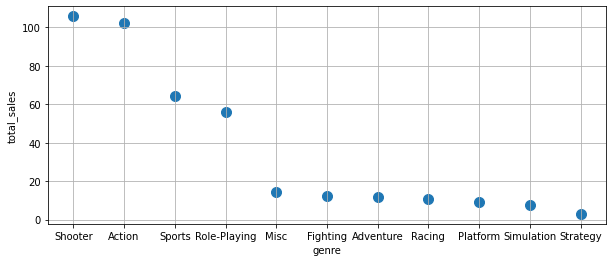

In [916]:
genre_pivot.loc[genre_pivot['total_sales']>=1.0].plot(x='genre', y='total_sales', figsize=( 10 , 4 ), 
                                                       kind='scatter', s=100, grid=True)

# строим график рапределения сумма продаж по жанрам для 10 самых продоваемых за  период 2015-2016

In [917]:
genre_pivot['total_sales'].describe()

count     12.000000
mean      33.160000
std       38.655059
min        0.720000
25%        8.847500
50%       12.175000
75%       57.947500
max      105.730000
Name: total_sales, dtype: float64

**Выводы:**

1. Рост реализа игр начался с 1992г. Максмимальное кол-во реализов было в 2009 году после чего начался спад.
2. Максимальный период реализа игр для платформы PC =  25 лет. Минимальный период реализа для платформ 1 год. Средний период реализа игр для платформ 6 лет.
3. Проанализировали девять платформ (XOne, PSV, Wii, X360, 3DS, PC, WiiU, PS3, PS4)  на которые еще выходили в 2016году реализы игр.\
- PS4 - 8.74 млн продаж в 2016. С 2015 года идет падение продаж. Прогноз падение продолжится.
- XOne - 7.35 млн продаж в 2016. С 2014 года идет падение продаж. Прогноз падение продолжится.
- PC - 3.69 млн продаж в 2016. С 2013 года идет рост продаж. Прогноз рост продолжится.
- PSV - 3.35 млн продаж в 2016. С 2014 года идет падение продаж. Прогноз падение продолжится.
- PS3 - 2.87 млн продаж в 2016. С 2015 года идет рост продаж. Прогноз рост продолжится.
4. Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам PS4, XOne, PC
- Экономически самая выгодная платформа XOne т.к. сумма продаж выше (на это указывает медиана, она больше чем у PS4 и PC, а так же Q4  выше чем у остальных платформ)
- - Экономически не самая выгодная платформа PC т.к. сумма продаж ниже (на это указывает медиана, она меньше чем у PS4 и PC, а так же Q4  ниже чем у остальных платформ)   
5. На примере платформ PS4, PC и XOne посмотрели как влияют оценки critic_score и user_score на total_sales
- корреляция между critic_score и total_sales  равна 0.4 у PC 0.3 у PS4 и 0.35 у XOne, что указывает на слабую прямую линейную связь.
- корреляция между user_score и total_sales примерно равна 0, что указывает на осутвие линейной связи. 
6. Самые продаваемый жанр Shooter (более 105млн).
7. Топ 5 по прадажам жанров за период 2015-2016 Shooter(более 105млн), Action(более 100млн), Sports(более 60млн), Role-Playing(чуть менее 60млн), Misc(около 17млн)

### Исследовательский анализ данных

In [918]:
na_platform = pd.pivot_table(data.loc[data['year_of_release'] > 2014], index='platform', values='na_sales',
                                aggfunc=np.sum).reset_index()
na_platform.sort_values('na_sales', ascending=False).head()
# определяем топ 5 самых популярных платформ по прадажам  для региона NA

,platform,na_sales
3,PS4,63.86
9,XOne,50.30
0,3DS,10.31
7,WiiU,8.86
8,X360,8.05


In [919]:
eu_platform = pd.pivot_table(data.loc[data['year_of_release'] > 2014], index='platform', values='eu_sales',
                                aggfunc=np.sum).reset_index()
eu_platform.sort_values('eu_sales', ascending=False).head()

# определяем топ 5 самых популярных платформ по прадажам  для региона EU

,platform,eu_sales
3,PS4,83.54
9,XOne,28.10
1,PC,9.10
0,3DS,7.39
2,PS3,7.30


In [920]:
jp_platform = pd.pivot_table(data.loc[data['year_of_release'] > 2014], index='platform', values='jp_sales',
                                aggfunc=np.sum).reset_index()
jp_platform.sort_values('jp_sales', ascending=False).head()
# определяем топ 5 самых популярных платформ по прадажам для региона JP

,platform,jp_sales
0,3DS,23.55
3,PS4,12.05
5,PSV,8.41
2,PS3,4.97
7,WiiU,4.12


In [921]:
genre_pivot_na = pd.pivot_table(data.loc[data['year_of_release'] > 2014], index='genre', values='na_sales',
                                aggfunc=np.sum).reset_index()
genre_pivot_na.sort_values('na_sales', ascending=False).head()
# определяем топ 5 самы продоваемые жанров в регионе NA

,genre,na_sales
8,Shooter,48.18
0,Action,33.68
10,Sports,26.31
7,Role-Playing,19.82
3,Misc,5.58


In [922]:
genre_pivot_eu = pd.pivot_table(data.loc[data['year_of_release'] > 2014], index='genre', values='eu_sales',
                                aggfunc=np.sum).reset_index()
genre_pivot_eu.sort_values('eu_sales', ascending=False).head()
# определяем топ 5 самы продоваемые жанров в регионе EU

,genre,eu_sales
8,Shooter,40.28
0,Action,34.82
10,Sports,27.82
7,Role-Playing,17.21
6,Racing,6.52


In [923]:
genre_pivot_jp = pd.pivot_table(data.loc[data['year_of_release'] > 2014], index='genre', values='jp_sales',
                                aggfunc=np.sum).reset_index()
genre_pivot_jp.sort_values('jp_sales', ascending=False).head()
# определяем топ 5 самы продоваемые жанров в регионе JP

,genre,jp_sales
0,Action,23.05
7,Role-Playing,13.41
8,Shooter,3.79
3,Misc,3.19
1,Adventure,2.22


In [924]:
rating_pivot = pd.pivot_table(data.loc[data['year_of_release'] > 2014], index='rating', values=['eu_sales','na_sales','jp_sales'],
                                aggfunc=np.sum).reset_index()
# делаем сводную таблицу с группировкой по рейтингу продаж

<AxesSubplot:xlabel='rating', ylabel='na_sales'>

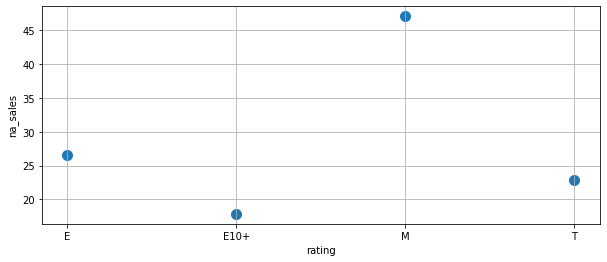

In [925]:
rating_pivot.plot(x='rating', y='na_sales', figsize=( 10 , 4 ), kind='scatter', grid=True, s=100)
# смотрим распределение продаж для региона NA относительно рейтинга

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

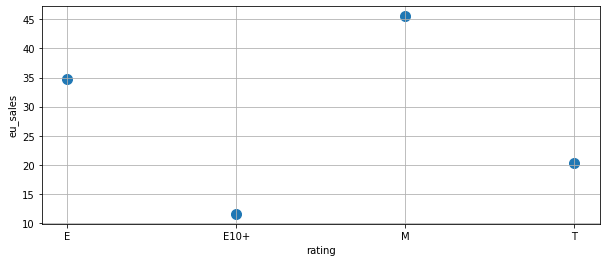

In [926]:
rating_pivot.plot(x='rating', y='eu_sales', figsize=( 10 , 4 ), kind='scatter', grid=True, s=100)
# смотрим распределение продаж для региона EU относительно рейтинга

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

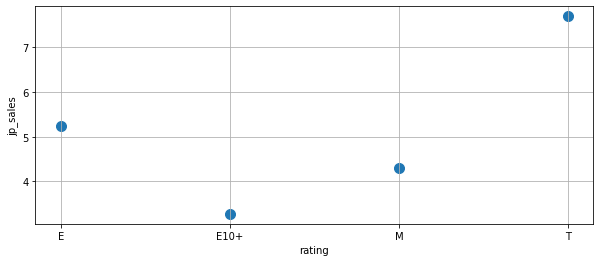

In [927]:
rating_pivot.plot(x='rating', y='jp_sales', figsize=( 10 , 4 ), kind='scatter', grid=True, s=100)
# смотрим распределение продаж для региона JP относительно рейтинга

#### **Выводы:**

1. В регионе NA самые продоваемые игры на платформах в порядке убывания PS4(64), XOne(50), 3DS(10), WiiU(9), X360(8)
2. В регионе EU самые продоваемые игры на платформах в порядке убывания  PS4(84), XOne(28), PC(9), 3DS(7), PS3(7)
3. В регионе JP самые продоваемые игры на платформах в порядке убывания  3DS(24), PS4(12), PSV(8), PS3(5), WiiU(4)

4. В регионе NA самые продоваемые игры с жанром в порядке убывания Shooter(48), Action(34), Sports(26), Role-Playing(20), Misc(6)
5. В регионе EU самые продоваемые игры с жанром в порядке убывания Shooter(40), Action(35), Sports(28), Role-Playing(17), Racing(7)
6. В регионе JP самые продоваемые игры с жанром в порядке убывания Action(23), Role-Playing(13), Shooter(4), Misc(3), Adventure(2)

7. Распределение продаж по регионам NA и EU в зависимости от рейтинга ESRB не отличается. 
8. Распределение продаж по региону JP отличается от NA и EU в зависимости от рейтинга ESRB, тем что максимальные продажи в JP у рейтинга Е, а в NA и EU с рейтингом М

### Проверка гипотез

#### Гипотеза №1
H_0: Среднее (user_score) Xbox One пользователей = среднее (user_score) PC  пользователей.\
H_1: Среднее (user_score) Xbox One пользователей != среднее (user_score) PC  пользователей.\
alpha = 0.05


In [928]:
from scipy import stats as st

In [929]:
results_1 = st.ttest_ind(
    data.loc[(data['platform']=='XOne') & (data['year_of_release'] > 2014), 'user_score'], 
    data.loc[(data['platform']=='PC') & (data['year_of_release'] > 2014), 'user_score'],
    equal_var=False) # results_1 = вызов метода для проверки гипотезы №1

alpha = 0.05 # alpha = задаём значение уровня значимости

print(results_1.pvalue) # вывод значения p-value на экран 
if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом

0.17037901928055904
Не получилось отвергнуть нулевую гипотезу


#### Гипотеза №2
H_0: Среднее (user_score) Action  жанра = среднее (user_score) Sports  жанра.\
H_1: Среднее (user_score) Action  жанра != среднее (user_score) Sports  жанра.\
alpha = 0.05

<div class="alert alert-info">
<b> 
 Добавил срез по данным 2015-2016
    
</b> 
</div>

In [930]:
results_2 = st.ttest_ind(
    data.loc[(data['genre']=='Action') & (data['year_of_release'] > 2014), 'user_score'], 
    data.loc[(data['genre']=='Sports') & (data['year_of_release'] > 2014), 'user_score'],
    equal_var=False) # results_2 = вызов метода для проверки гипотезы №2

alpha = 0.05 # alpha = задаём значение уровня значимости

print(results_2.pvalue) # вывод значения p-value на экран 
if results_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом
     

3.542055618874955e-11
Отвергаем нулевую гипотезу


<div class="alert alert-info">
<b> 
 Добавил срез по данным 2015-2016
    
</b> 
</div>

**Выводы:**

1. Уровень значимости alpha выбран 0,05 общепринятое пороговые значение
2. Гипотезу о том, что "Среднее (user_score) Xbox One пользователей = среднее (user_score) PC пользователей." - нет оснований отвергать.
3. Гипотезу о том, что "Среднее (user_score) Action жанра = среднее (user_score) Sports жанра." - не подтвердилась.

### Общий вывод:

**Был проведен анализ датасета по продажам игр и получены следующие основные выводы:**

1. Рост реализа игр начался с 1992г. Максмимальное кол-во реализов было в 2009 году после чего начался спад.
2. Максимальный период реализа игр для платформы PC = 25 лет. Минимальный период реализа для платформ 1 год. Средний период реализа игр для платформ 6 лет.
3. Экономически самая выгодная платформа из топ 3 -  XOne
4. Экономически не самая выгодная платформа из топ 3 -  PC
5. На примере платформ PS4, PC и XOne посмотрели как влияют оценки critic_score и user_score на total_sales корреляция между critic_score и total_sales равна 0.4 у PC 0.3 у PS4 и 0.35 у XOne, что указывает на слабую прямую линейную связь. Корреляция между user_score и total_sales примерно равна 0, что указывает на осутвие линейной связи.
6. Самый продаваемый жанр в период 2015-2016 Shooter (более 105млн). Топ 5 по прадажам жанров Shooter(более 105млн), Action(более 100млн), Sports(более 60млн), Role-Playing(чуть менее 60млн), Misc(около 17млн)
7. Распределение продаж по регионам NA и EU в зависимости от рейтинга ESRB не отличается. Распределение продаж по региону JP отличается от NA и EU в зависимости от рейтинга ESRB, тем что в показателе рейтинга E(все возроста) продажи ниже.
8. Гипотеза "Среднее (user_score) Xbox One пользователей = среднее (user_score) PC пользователей" - не получилось отвергнуть
9. Гипотеза "Среднее (user_score) Action жанра = среднее (user_score) Sports жанра." - не подтвердилась